In [1]:
import tensorflow
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
COUNTRY_NAME = 'UNITED KINGDOM'

In [5]:
ds = pd.read_csv('fossil-fuel-co2-emissions-by-nation.csv')

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ds_mexico = ds.loc[ds['Country'] == COUNTRY_NAME].values

In [8]:
ds_mexico = ds_mexico[:,2:]

In [9]:
sc = StandardScaler()
ds_mexico = sc.fit_transform(ds_mexico)

Text(0.5, 1.0, 'FOSSIL FUE USAGE OF UNITED KINGDOM')

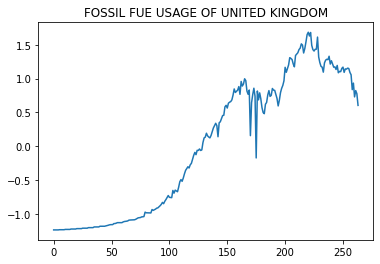

In [12]:
plt.plot(ds_mexico[:,0])
plt.title((f'FOSSIL FUE USAGE OF {COUNTRY_NAME}'))

In [13]:
YEARS_FALLBACK = 15
TEST_SIZE = 15

In [14]:
ds_mexico_train = []
ds_mexico_trainy = []
for i in range(ds_mexico.shape[0]-YEARS_FALLBACK-TEST_SIZE):
    ds_mexico_train.append(ds_mexico[i:i+YEARS_FALLBACK])
    ds_mexico_trainy.append(ds_mexico[i+1+YEARS_FALLBACK,0])
ds_mexico_train = np.array(ds_mexico_train)
ds_mexico_trainy = np.array(ds_mexico_trainy)

In [15]:
fspnet = keras.Sequential([
    keras.layers.GRU(200,return_sequences=True),
    keras.layers.Dropout(0.15),
    keras.layers.GRU(200,return_sequences=True),
    keras.layers.Dropout(0.15),
    keras.layers.GRU(200,return_sequences=True),
    keras.layers.Dropout(0.15),
    keras.layers.GRU(200,return_sequences=False),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(1)




])

In [16]:
fspnet.compile(keras.optimizers.Adam(),keras.losses.MeanSquaredError(),metrics=['accuracy'])

In [17]:
fspnet.build(input_shape=(ds_mexico_train.shape[1],ds_mexico_train.shape[2]))

ValueError: Input 0 of layer "gru" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (15, 8)

In [18]:
fspnet.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [19]:
fspnet.fit(ds_mexico_train,ds_mexico_trainy,32,200)

Epoch 1/200
8/8 [==============================] - 5s 22ms/step - loss: 0.3230 - accuracy: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0494 - accuracy: 0.0000e+00
Epoch 3/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0328 - accuracy: 0.0000e+00
Epoch 4/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0399 - accuracy: 0.0000e+00
Epoch 5/200
8/8 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.0000e+00
Epoch 6/200
8/8 [==============================] - 0s 12ms/step - loss: 0.0292 - accuracy: 0.0000e+00
Epoch 7/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0261 - accuracy: 0.0000e+00
Epoch 8/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0249 - accuracy: 0.0000e+00
Epoch 9/200
8/8 [==============================] - 0s 13ms/step - loss: 0.0242 - accuracy: 0.0000e+00
Epoch 10/200
8/8 [==============================] - 0s 12ms/step - loss: 0.0190 - 

In [20]:
mex_test_y = []
mex_testx = []
for i in range(YEARS_FALLBACK+TEST_SIZE):
    mex_testx.append(ds_mexico[i:i+YEARS_FALLBACK])
    mex_test_y.append(ds_mexico[i+1+YEARS_FALLBACK,0])
mex_testx = np.array(mex_testx)
mex_test_y = np.array(mex_test_y)

In [21]:
prediction = fspnet.predict_on_batch(mex_testx)

(-2.0, -1.0)

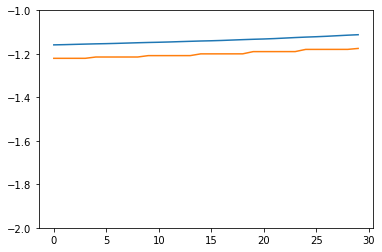

In [26]:
plt.plot(prediction)
plt.plot(mex_test_y)
plt.ylim((-2,-1))